# CH3 无监督学习与预处理

## 3.1 无监督学习的类型

**本章将研究两种类型的无监督学习：**
+ 数据集变换
+ 聚类

## 3.2 无监督学习的挑战

## 3.3 预处理与缩放

预处理和缩放通常与监督学习一起使用，但缩放方法并没有用到与“监督”有关的信息，所以是无监督的。

通常的做法是对特征进行调节，使数据表示更适合于这些算法。

### 3.3.1 不同类型的预处理

+ **`StandardScaler()`**：确保每个特征的平均值为0、方差为1，是所有特征都位于同一量级。但这种缩放不能保证特征任何特定的最大值和最小值。


+ **`RobustScaler()`**： 工作原理与StandardScaler类似，以确保每个特征的统计属性都位于同一范围。但RobustScaler使用的是中位数和四分位数，而不是平均值和方差。这样RobustScaler会忽略与其他点有很大不同的数据点（比如测量误差），这些数据点称为**异常值（outlier）**，可能会给其他缩放造成麻烦。


+ **`MinMaxScaler()`**：移动数据，使所有特征都刚好位于0到1之间。对于二维数据集来说，所有的数据都包含在x轴0到1与y轴0到1组成的矩形中。


+ **`Normalizer()`**：用到一种完全不同的缩放方法。Normalizer对每个数据点进行缩放，使得特征向量的欧式长度等于1。换句话说，它将每看一个数据点投射到半径为1的圆上（对于更高维度的情况，是球面）。这意味着每个数据点的缩放比例都不相同（乘以其长度的倒数）。如果只有数据的方向（或角度）是重要的，而特征向量的长度无关紧要，那么通常会使用这种归一化。

In [1]:
# Common imports
import pandas as pd
import numpy as np

# To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"

In [2]:
# Load the dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=1, random_state=4)
X += 3

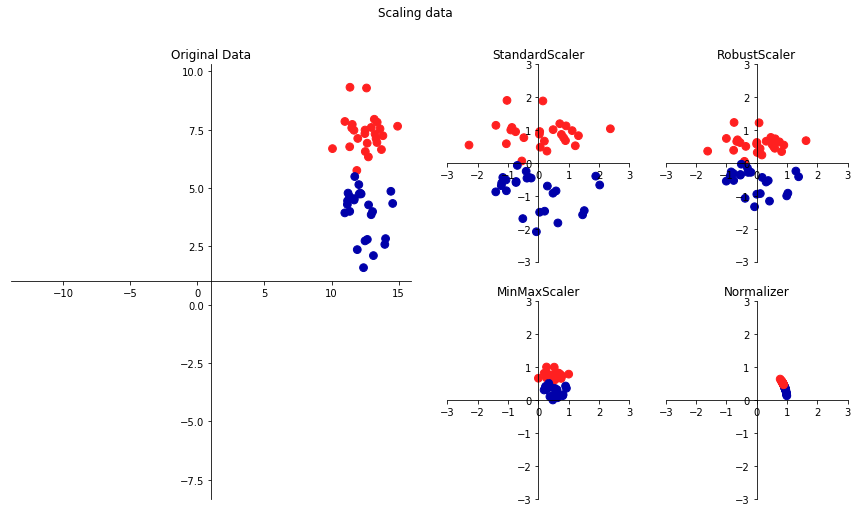

In [3]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import (StandardScaler, RobustScaler, MinMaxScaler,
                                   Normalizer)

cmap = ListedColormap(['#0000aa', '#ff2020'])

plt.figure(figsize=(15, 8))

main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=60)
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()
main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")

others_axes = [plt.subplot2grid((2, 4), (i, j))
               for i in range(2) for j in range(2, 4)]
for ax, scaler in zip(others_axes, [StandardScaler(), RobustScaler(),
                                    MinMaxScaler(), Normalizer()]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cmap, s=60)
    ax.set_xlim(-3, 3)  # Set the data limits for the x-axis (X轴刻度范围)
    ax.set_ylim(-3, 3)  # Set the data limits for the y-axis (Y轴刻度范围)
    ax.set_title(type(scaler).__name__)

others_axes.append(main_ax)
for ax in others_axes:
    # 设置脊柱（坐标轴位置）
    # 更改参数去实验
    ax.spines["left"].set_position("center")
    ax.spines["right"].set_color("none")
    ax.spines["bottom"].set_position("center")
    ax.spines["top"].set_color("none")
    ax.xaxis.set_ticks_position("bottom")  # X轴刻度位置（下方）
    ax.yaxis.set_ticks_position("left")    # Y轴刻度位置（左侧）

plt.suptitle("Scaling data")
plt.show()

### 3.3.2 应用数据变换

将核SVM（SVC）应用在cancer数据集上，并使用MinMaxScaler来预处理数据。

+ 加载数据集，并将其分为训练集和测试集

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the data
cancer = load_breast_cancer()

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# Split the data into training set and test set
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("The shape of training set: ", X_train.shape)
print("The shape of test set: ", X_test.shape)

The shape of training set:  (426, 30)
The shape of test set:  (143, 30)


+ 预处理

In [8]:
from sklearn.preprocessing import MinMaxScaler

mms_scaler = MinMaxScaler()
# Fit the training data
mms_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
# Transform training data
X_train_scaled = mms_scaler.transform(X_train)
# Print dataset properties before and after scaling
print("transformed shape:{}".format(X_train_scaled.shape))
print("\nper-feature minimum before scaling:\n{}".format(X_train.min(axis=0)))
print("\nper-feature maximum before scaling:\n{}".format(X_train.max(axis=0)))
print("\nper-feature minimum after scaling:\n{}".format(
    X_train_scaled.min(axis=0)))
print("\npr-feature maximum after scaling:\n{}".format(
    X_train_scaled.max(axis=0)))

transformed shape:(426, 30)

per-feature minimum before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]

per-feature maximum before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]

per-feature minimum after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

pr-feature maximum after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


> 变换后的数据形状与原始数据相同，特征只是发生了移动和缩放。现在所有特征都位于0到1之间。

+ 对测试集进行变换

In [10]:
# Transform test data
X_test_scaled = mms_scaler.transform(X_test)
# Print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(
    X_test_scaled.min(axis=0)))
print("\nper-feature maximum after scaling:\n{}".format(
    X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]

per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


> 对测试集缩放后的最大值和最小值不是1和0，有些特征甚至在0-1之外。**`MinMaxScaler()`（以及其他所有缩放器）总是对训练集和测试集应用完全相同的变换。也就是说，`transform()`方法总是减去训练集的最小值，然后除以训练集的范围，而这个两个值可能与测试集的最小值和范围并不相同。**

### 3.3.3 对训练数据和测试数据进行相同的缩放

为了让模型能够在测试集上运行，对训练集和测试集应用完全相同的变换非常重要。

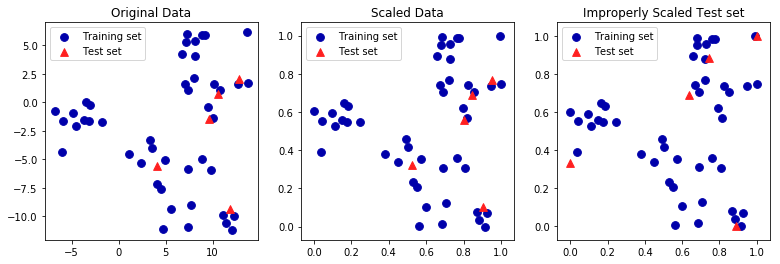

In [11]:
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

# Make synthetic (合成的，人造的) data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# Split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

cmap = ListedColormap(['#0000aa', '#ff2020'])

# Plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=cmap(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1],
                marker="^", c=cmap(1), label="Test set", s=60)
axes[0].set_title("Original Data")
axes[0].legend(loc="best")

# Scale the data using MinMaxScaler
mms_scaler = MinMaxScaler()
X_train_scaled = mms_scaler.fit_transform(X_train)
X_test_scaled = mms_scaler.transform(X_test)

# Visulize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=cmap(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                marker="^", c=cmap(1), label="Test set", s=60)
axes[1].legend(loc="best")
axes[1].set_title("Scaled Data")

# Rescale the test set separately
# So test set min is 0 and test set max is 1
# But, DO NOT DO THIS!
test_scaler = MinMaxScaler()
X_test_scaled_badly = test_scaler.fit_transform(X_test)

# Visualize the wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=cmap(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker="^", c=cmap(1), label="Test set", s=60)
axes[2].legend(loc="best")
axes[2].set_title("Improperly Scaled Test set")

plt.show()

另一种方法绘图：

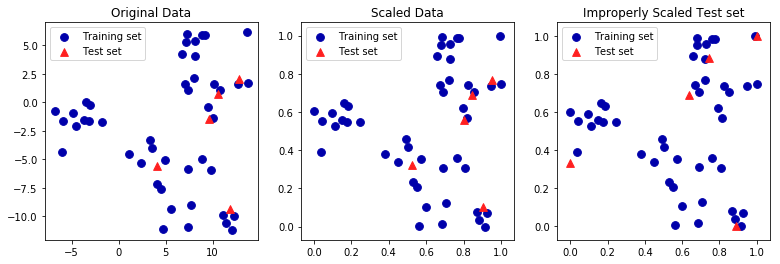

In [12]:
plt.figure(figsize=(13, 4))

plt.subplot(131)
plt.scatter(X_train[:, 0], X_train[:, 1],
                c=cmap(0), label="Training set", s=60)
plt.scatter(X_test[:, 0], X_test[:, 1],
                marker="^", c=cmap(1), label="Test set", s=60)
plt.title("Original Data")
plt.legend(loc="best")

# Scale the data using MinMaxScaler
mms_scaler = MinMaxScaler()
X_train_scaled = mms_scaler.fit_transform(X_train)
X_test_scaled = mms_scaler.transform(X_test)

# Visulize the properly scaled data
plt.subplot(132)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=cmap(0), label="Training set", s=60)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                marker="^", c=cmap(1), label="Test set", s=60)
plt.legend(loc="best")
plt.title("Scaled Data")

# Rescale the test set separately
# So test set min is 0 and test set max is 1
# But, DO NOT DO THIS!
test_scaler = MinMaxScaler()
X_test_scaled_badly = test_scaler.fit_transform(X_test)

# Visualize the wrongly scaled data
plt.subplot(133)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=cmap(0), label="Training set", s=60)
plt.scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker="^", c=cmap(1), label="Test set", s=60)
plt.legend(loc="best")
plt.title("Improperly Scaled Test set")

plt.show()

### 3.3.4 预处理对监督学习的作用

+ 在原始数据集上拟合SVC：

In [13]:
from sklearn.svm import SVC

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svc = SVC(C=100)  # default: kernel is "rbf"
svc.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svc.score(X_test, y_test)))

Test set accuracy: 0.63


+ 先用MinMaxScaler对数据进行缩放，再进行拟合：

In [14]:
# Preprocessin using 0-1 scaling
mms_scaler = MinMaxScaler()
X_train_scaled = mms_scaler.fit_transform(X_train)
X_test_scaled = mms_scaler.transform(X_test)

# Learning an SVC on the scaled training data
svc.fit(X_train_scaled, y_train)

# Scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svc.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


+ 使用StandardScaler进行缩放：

In [15]:
# Preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

# Learning an SVC on the scaled training data
svc.fit(X_train_scaled, y_train)

# Scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svc.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.96


## 3.2 聚类

聚类(clustering)：是将数据集划分成组的任务，这些组叫做簇(cluster)。其目标是划分数据，使得一个簇内的数据点非常相似且不同簇内的数据点非常不同。

### 3.2.1 k均值聚类（k-means）

In [1]:
# Common imports
import pandas as pd
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import mglearn

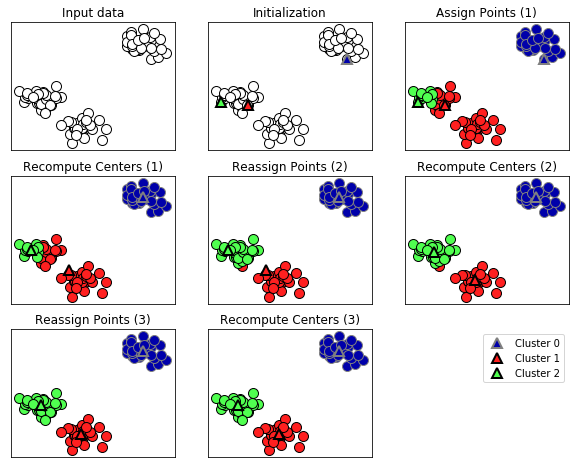

In [2]:
mglearn.plots.plot_kmeans_algorithm()

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create dataset
X, y = make_blobs(random_state=1)

# Build clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
print("Labels of each point:\b{}".format(kmeans.labels_))

Labels of each point:[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


> 数字0,1,2没有任何意义，只是表示标签。再次运行改算法可能会得到不同的簇编号，原因在于初始化的随机性质。

In [5]:
labels = kmeans.labels_

In [6]:
kmeans.cluster_centers_

array([[-10.04935243,  -3.85954095],
       [ -1.4710815 ,   4.33721882],
       [ -6.58196786,  -8.17239339]])

In [8]:
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])

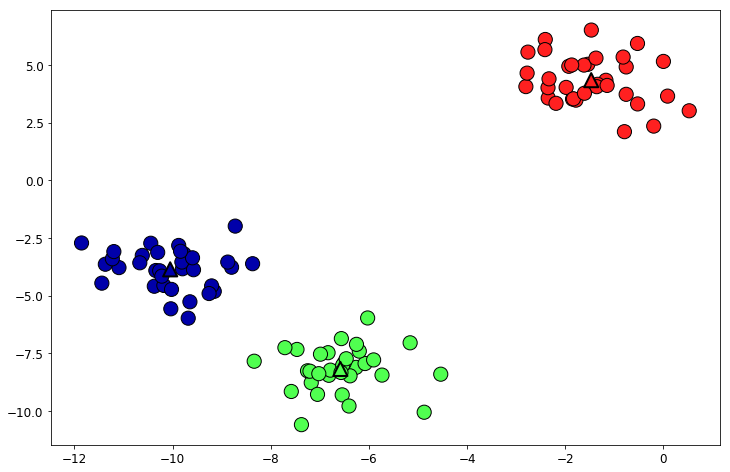

In [9]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=cm3, s=200, edgecolors="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker="^", s=200, linewidth=2, c=[0, 1, 2], cmap=cm3, edgecolors="k")
plt.show()

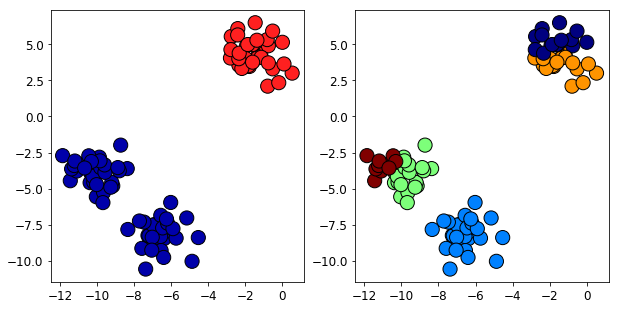

In [10]:
plt.figure(figsize=(10, 5))

# Use two cluster centers
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

# plot the cluster assignments
plt.subplot(121)
cm2 = ListedColormap(['#0000aa', '#ff2020'])
plt.scatter(X[:, 0], X[:, 1], c=assignments, cmap=cm2, s=200, edgecolors="k")

# Use five cluster centers
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

# plot the cluster assignments
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=assignments, s=200, cmap=plt.cm.jet, edgecolors="k")
plt.show()

#### 1. k均值中的失败案例

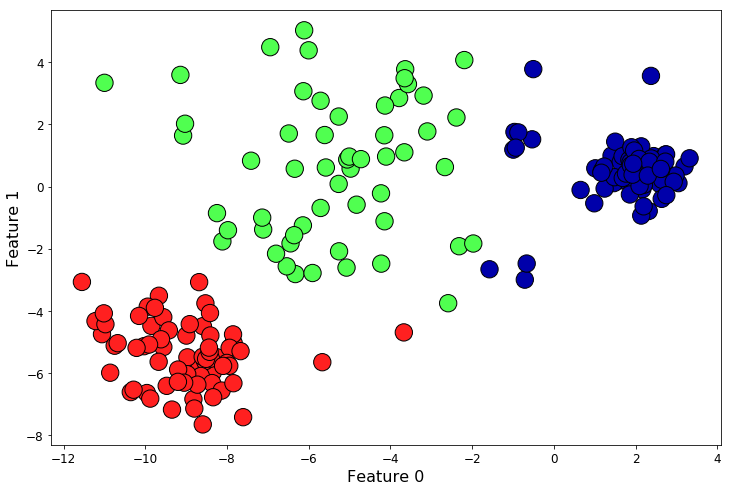

In [15]:
# Generate some random cluster data
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

# K-means(k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_varied)

y_pred = kmeans.predict(X_varied)

# Plot the result
plt.figure(figsize=(12, 8))
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, cmap=cm3, marker="o",
            s=300, edgecolors="k")
plt.xlabel("Feature 0", fontsize=16)
plt.ylabel("Feature 1", fontsize=16)
plt.show()

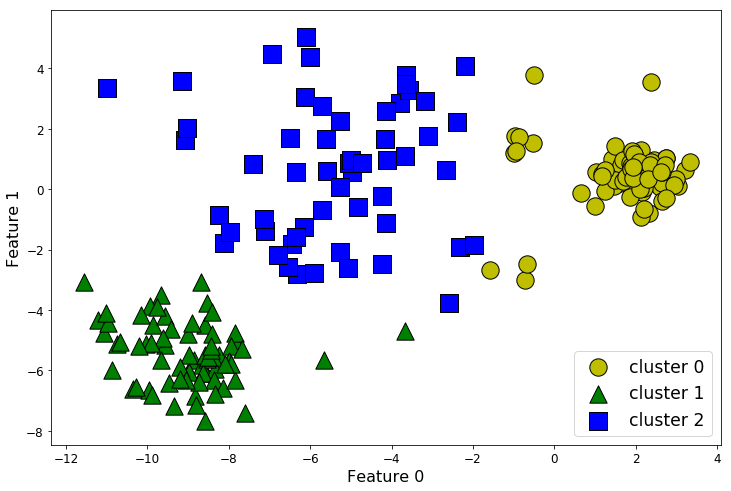

In [13]:
# Generate some random cluster data
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

# K-means(k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_varied)

y_pred = kmeans.predict(X_varied)

# Plot the result
plt.figure(figsize=(12, 8))
colors = ["y", "g", "b", ]
markers = ["o", "^", "s"]
for i, (marker, color) in enumerate(zip(markers, colors)):
    plt.scatter(X_varied[:, 0][y_pred == i], X_varied[:, 1][y_pred == i],
                c=color, s=300, edgecolors="k", marker=marker,)
plt.legend(["cluster 0", "cluster 1", "cluster 2"],
           loc="lower right", fontsize="xx-large")
plt.xlabel("Feature 0", fontsize=16)
plt.ylabel("Feature 1", fontsize=16)
plt.show()

**K-Means还假设所有方向对每个簇同等重要。**

In [95]:
plt.cm.brg(0)

(0.0, 0.0, 1.0, 1.0)

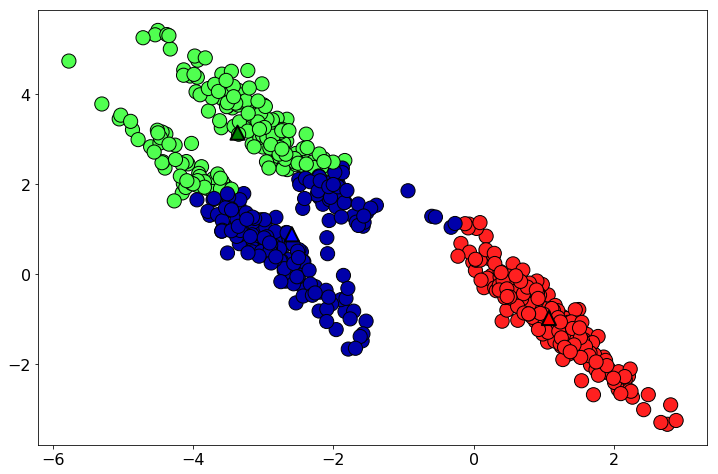

In [17]:
# Generate some random cluster data
X, y = make_blobs(n_samples=600, random_state=170)
rng = np.random.RandomState(74)

# Transform the data to the stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Cluster the data into 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cm3, s=200, edgecolors="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker="^", c=['b', 'r', 'g'], s=200, linewidth=2, edgecolors='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

> 数据中包含明确分开的三个部分。但是这三个部分被沿着对角线方向拉升。由于K-Means仅考虑到最近簇中心的距离，所以它无法处理这种类型的数据。

如果簇的形状更复杂，那么K-Means的表现也很差：

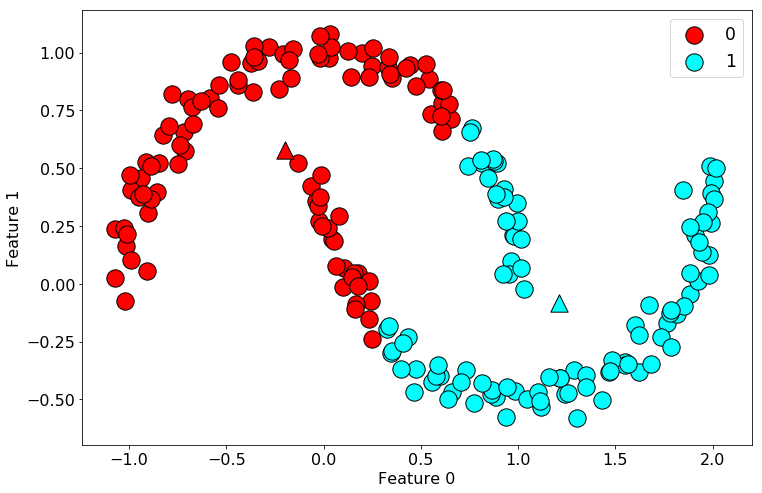

In [31]:
# Generate synthetic(合成的，人造的) two_moons data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Cluster the data into 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
plt.figure(figsize=(12, 8))
colors = ["r", "cyan"]
for i in range(kmeans.n_clusters):
    plt.scatter(X[:, 0][y_pred == i], X[:, 1][y_pred == i],
                c=colors[i], s=300, edgecolors="k", label='{}'.format(i))
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1],
                c=colors[i], marker="^", s=300, edgecolors="k")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Feature 0", fontsize=16)
plt.ylabel("Feature 1", fontsize=16)
plt.legend(loc='best', fontsize='xx-large')
plt.show()

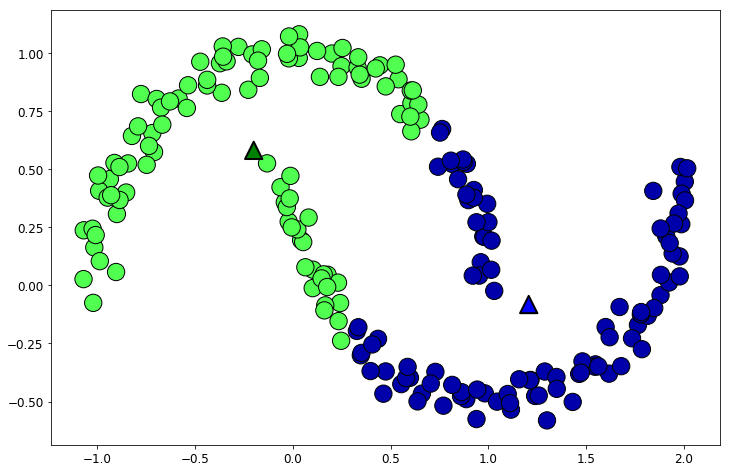

In [37]:
# Generate synthetic(合成的，人造的) two_moons data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Cluster the data into 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cm3, s=300, edgecolors="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker="^", c=['b', 'g'], s=300, edgecolors='k', linewidth=2)
plt.show()

> 这里希望能发现两个半月形。但利用K-Means算法是不可能做到的。

#### 2 矢量量化， 或者将K-Means看作分解

K-Means尝试利用簇中心来表示每个数据点。可以将其看作仅用一个分量来表示每个数据点，该分量由簇中心给出。这种观点将K-Means看作一种分解方法，其中每个点用单一分量来表示，这种观点被称为**矢量量化（vector quantization）**。

利用K-Means做矢量量化的一个有趣之处在于，可以用比输入维度更多的簇来对数据进行编码。

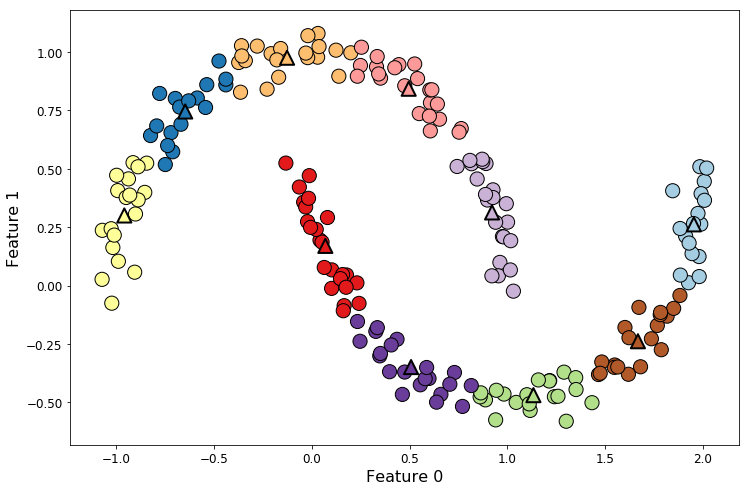

Cluster memberships:
[6 9 4 8 9 9 6 2 6 2 5 7 9 2 1 6 3 7 3 1 0 2 5 2 5 4 9 0 4 5 6 5 2 4 3 0 7
 6 8 4 7 1 3 4 9 5 6 1 4 2 1 7 0 8 2 3 3 2 3 5 7 8 9 6 2 8 5 9 5 8 7 8 7 4
 7 8 4 6 3 7 0 5 7 0 4 5 6 5 7 0 3 6 0 1 0 9 9 7 8 4 2 0 5 6 8 4 8 1 9 3 1
 5 5 8 6 2 3 0 7 6 6 1 4 5 4 1 6 4 2 0 6 1 8 7 2 9 2 8 0 6 4 4 3 5 1 6 4 2
 3 4 7 9 6 3 7 5 2 7 3 3 4 2 3 9 7 9 3 7 9 2 3 8 8 1 4 2 0 1 1 3 9 8 0 9 0
 3 5 7 8 1 8 3 6 6 4 1 0 4 5 9]


In [39]:
# Generate synthetic two_moons data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# K-means(k=10)
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=200, cmap=plt.cm.Paired,
            edgecolors="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker="^", c=range(kmeans.n_clusters), edgecolors='k',
            linewidth=2, cmap=plt.cm.Paired)
plt.xlabel("Feature 0", fontsize=16)
plt.ylabel("Feature 1", fontsize=16)
plt.show()
print("Cluster memberships:\n{}".format(y_pred))

使用了10个簇中心，现在每个数据点都被分配了0-9之间的一个数字。我们可以将每个数据点看作10个分量表示的数据（这里，10个特征），只有表示该点对应的簇中心的那个特征不为0，其他特征均为0。利用这个10维表示，现在可以用线性模型来划分两个半月形，而利用原始的两个特征是不可能做到这一点的。

将到每个簇中心的距离作为特征，还可以得到一种表现力更强的数据表示。使用`transform`方法可以表示这一点：

In [40]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[ 1.16555129  1.48034956  1.04013486 ...,  0.92375074  1.78820579
   1.14060718]
 [ 0.72381874  2.52921971  0.4935202  ...,  1.1111508   2.66446252
   0.149581  ]
 [ 1.97438819  0.78321505  1.37288227 ...,  0.81711805  0.93673651
   1.76451208]
 ..., 
 [ 1.79761869  1.11471941  1.06309851 ...,  0.47650372  1.17433285
   1.50934512]
 [ 1.97508335  0.81425026  1.78881986 ...,  1.41001291  1.29279485
   1.98349977]
 [ 0.5877911   2.46626118  0.54671574 ...,  1.1207139   2.63174223
   0.04819401]]


**Demonstration of K-means assumptions**

This example is meant to illustrate situations where k-means will produce unintutive and possibly unexpected clusters.

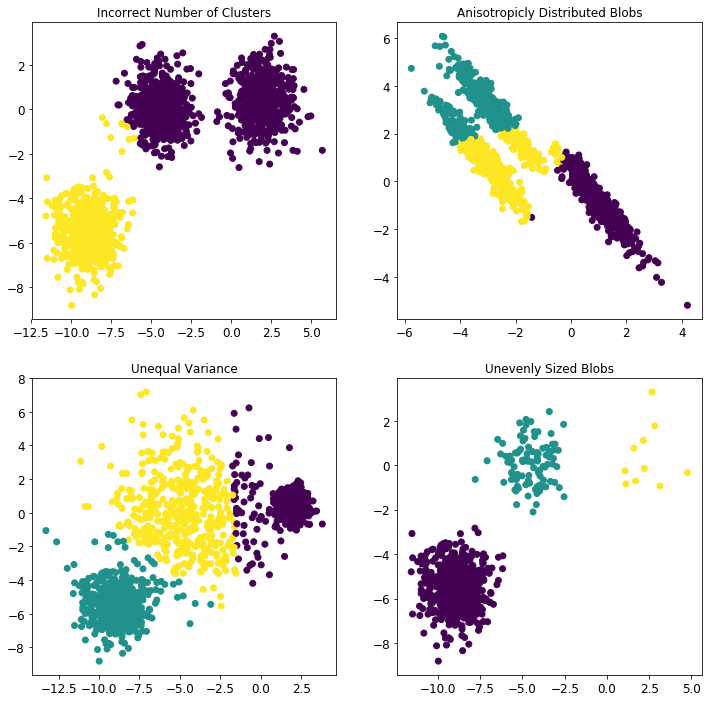

In [44]:
plt.figure(figsize=(12, 12))

# Generate synthetic data
X, y = make_blobs(n_samples=1500, random_state=170)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Clusters")

# Anisotropicly(各向异性地) distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(X_aniso)
plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=1500, random_state=170,
                                cluster_std=[1.0, 2.5, 0.5])
y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(X_varied)
plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(X_filtered)
plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

> In the first three plots, the input data does not conform to(符合，遵守) some implicit assumption that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive despite unevenly sized blobs.

### 3.2.2 凝聚聚类

In [45]:
from sklearn.cluster import AgglomerativeClustering

**The linkage criteria determines the metric used for the merge strategy**
+ ward (default)
+ average linkage
+ complete or maximum linkage

In [46]:
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
# Performs clustering on X and returns cluster labels
assignment = agg.fit_predict(X)
assignment

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1,
       0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 0,
       2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 2, 1, 1, 0, 1, 0], dtype=int64)

In [47]:
agg.labels_  # Cluster labels for each point

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1,
       0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 0,
       2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 2, 1, 1, 0, 1, 0], dtype=int64)

In [48]:
# Number of leaves in hierachical tree
agg.n_leaves_

100

In [49]:
len(y)

100

In [50]:
# The estimated number of connected components in the graph
agg.n_components_

1

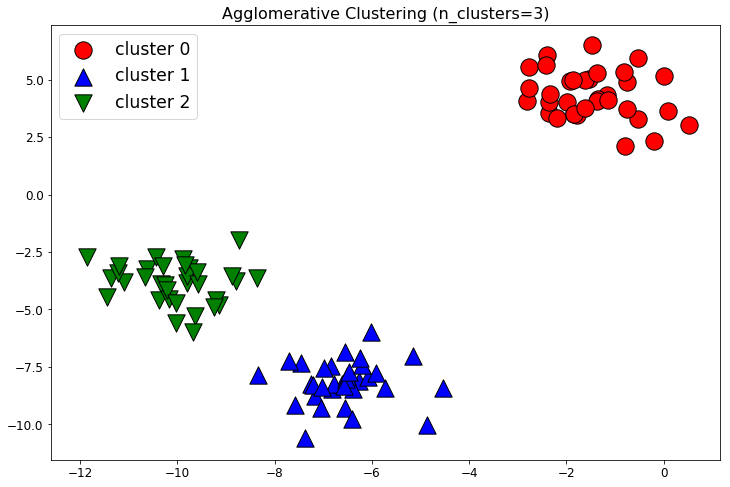

In [51]:
# Plot the result
plt.figure(figsize=(12, 8))

markers = ["o", "^", "v"]
colors = ["r", "b", "g"]

for i, (marker, color) in enumerate(zip(markers, colors)):
    plt.scatter(X[:, 0][assignment == i], X[:, 1][assignment == i],
                marker=marker, c=color, s=300, edgecolors="k",
                label="cluster {}".format(i))
plt.legend(loc="best", fontsize="xx-large")
plt.title("Agglomerative Clustering (n_clusters=3)", fontsize=16)
plt.show()

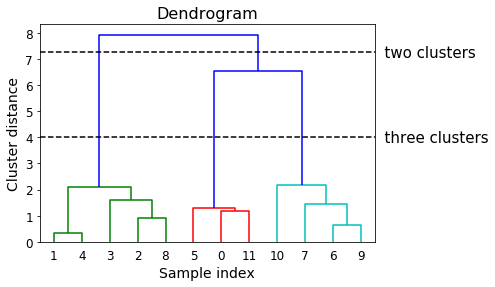

In [71]:
# 从SciPy中导入dendrogram函数和ward聚类函数
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(n_samples=12, random_state=0)  # X.shape: (12, 2)

# 将ward聚类函数应用到数组X
# ward函数返回一个数组，指定执行凝聚聚类时跨越的距离
linkage_array = ward(X)

# 为包含簇之间距离的linkage_array绘制树状图
dendrogram(linkage_array)

# 在树中标记划分成两个簇或三个簇的位置
ax = plt.gca()
# Return the lower and upper x-axis bounds, in increasing order
bounds = ax.get_xbound()  # returns: (0.0, 120.0)
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, "  two clusters", va="center", fontdict={"size": 15})
ax.text(bounds[1], 4, "  three clusters", va='center', fontdict={"size": 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.title("Dendrogram", fontsize=16)
plt.show()

### 3.2.3 DBSCAN

In [72]:
from sklearn.cluster import DBSCAN

In [75]:
X, y = make_blobs(n_samples=12, random_state=0)  # X.shape: (12, 2)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


> 被分配了标签-1的数据点是噪声（noise）。

**`min_samples`和`eps`去不同值的簇分类结果**

In [77]:
60 * np.ones(X.shape[0])

array([ 60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,
        60.])

min_samples: 2 eps: 1.000000 cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000 cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000 cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000 cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000 cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000 cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000 cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000 cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000 cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000 cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000 cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000 cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


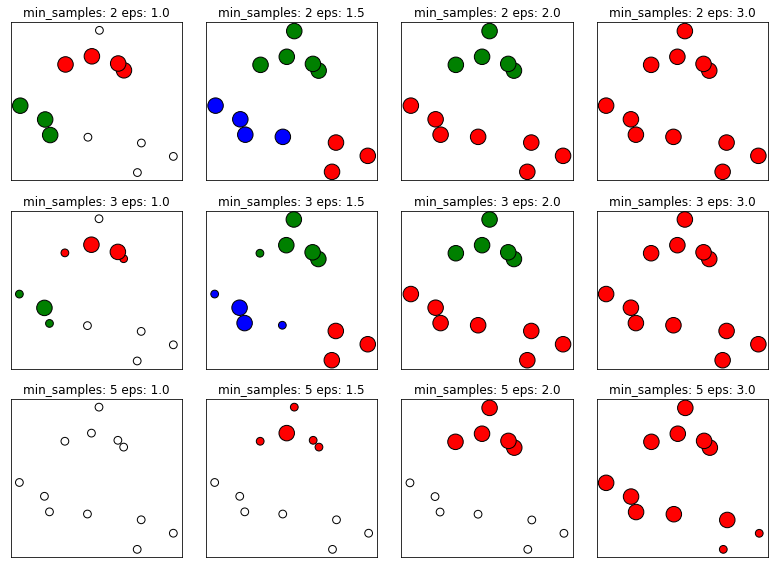

In [82]:
fig, axes = plt.subplots(3, 4, figsize=(11, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
# Plot clusters as red, green, and blue, and outliers (-1) as white
colors = np.array(['r', 'g', 'b', 'w'])

# Iterate over settings of min_samples and eps
for i, min_samples in enumerate([2, 3, 5]):
    for j, eps in enumerate([1, 1.5, 2, 3]):
        # instance DBSCAN with a particular setting
        dbscan = DBSCAN(min_samples=min_samples, eps=eps)
        # Get cluster assignments
        clusters = dbscan.fit_predict(X)
        print("min_samples: %d eps: %f cluster: %s" %
              (min_samples, eps, clusters))
        # Visualize core samples and clusters
        sizes = 60 * np.ones(X.shape[0])
        # Size is given by whether sth is a core sample
        sizes[dbscan.core_sample_indices_] *= 4
        axes[i, j].scatter(X[:, 0], X[:, 1], c=colors[clusters], s=sizes,
                           edgecolors='k')
        axes[i, j].set_title("min_samples: %d eps: %.1f" % (min_samples, eps))
fig.tight_layout()

**在tow_moons数据集上运行DBSCAN**

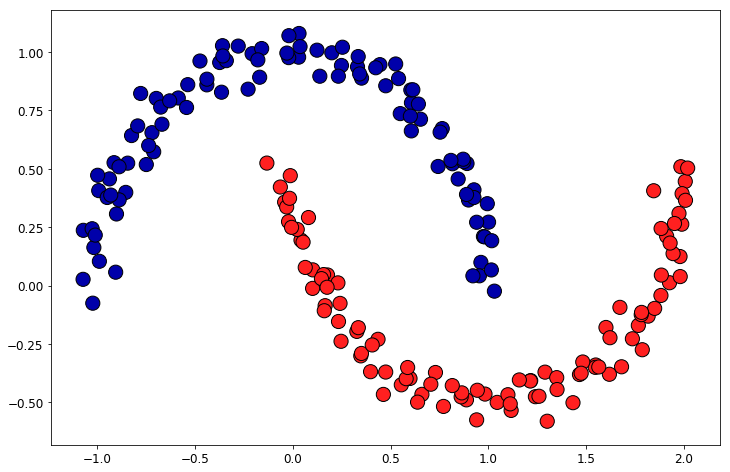

In [87]:
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# Plot the cluster assignments
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap=cm2, s=200,edgecolors='k')
plt.show()

**Example: Demo of DBSCAN Clustering Algorithm (from skl)**
> Find core samples of high density and expands clusters from them.

Estimated number of clusters: 3
Homogeneity 0.947
Completeness 0.868
V-measure :0.906
Adjusted Rand Index: 0.943
Adjusted Mutual Infomation: 0.867
Silhouette Coefficient : 0.621


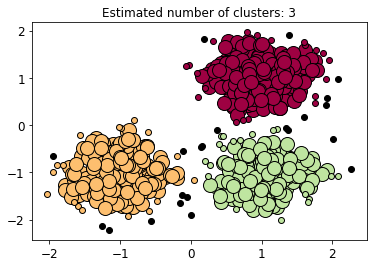

In [99]:
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X_scaled = StandardScaler().fit_transform(X)

# Compute DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure :%0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Infomation: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient : %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, color in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        color = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
             markeredgecolor='k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
             markeredgecolor='k', markersize=6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### 3.2.4 聚类算法的对比与评估

#### 1 用真实值评估聚类

评估聚类算法相对于真实聚类的结果，其中最重要的是**调整rand指数（adjusted rand index, ARI）**和**归一化互信息（normalized mutual information, NMI）**，二者都给出了定量的度量，其最佳值为1，0表示不相关的聚类（ARI可以去负值）。

**使用ARI来比较k-means、agglometative clustering和DBSCAN**

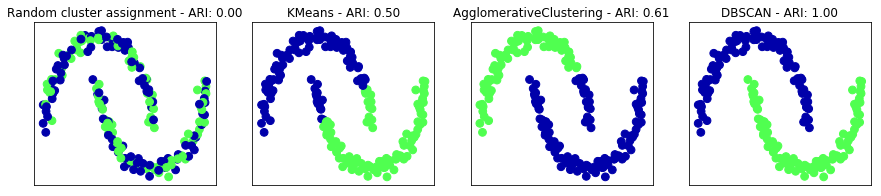

In [104]:
from sklearn.metrics import adjusted_rand_score

# Generate sample data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
X_scaled = StandardScaler().fit_transform(X)

# Make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# Create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# Plot the random cluster assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=cm3, s=60)
axes[0].set_title("Random cluster assignment - ARI: {:.2f}".format(
    adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # Plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=cm3, s=60)
    ax.set_title("%s - ARI: %0.2f" %
                 (algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))
plt.show()

> 用这种方式评估聚类时，一个常见的错误时使用`accuracy_score`而不是ARI、MI或其他聚类指标。使用精度的问题在于，它要求分配的簇标签与真实值完全匹配。但簇标签本身毫无意义——唯一重要的是哪些点位于同一个簇中。

In [105]:
from sklearn.metrics import accuracy_score

# These two labelings of points correspond to the same clustering:
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# Accuracy is 0, as none of the labels are the same:
print("Accuracy: %.2f" % accuracy_score(clusters1, clusters2))

# Adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: %.2f" % adjusted_rand_score(clusters1, clusters2))

Accuracy: 0.00
ARI: 1.00


#### 2 在完全没有真实值的情况下评估聚类

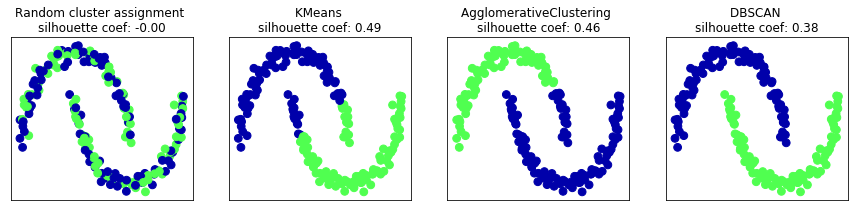

In [109]:
from sklearn.metrics import silhouette_score

# Generate sample data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
X_scaled = StandardScaler().fit_transform(X)

# Make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# Create a random cluster assignment for reference:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# Plot the random cluster assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=cm3, s=60)
axes[0].set_title("Random cluster assignment \nsilhouette coef: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # Plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=cm3, s=60)
    ax.set_title("%s \nsilhouette coef: %0.2f" %
                 (algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))
plt.show()